In [1]:
import torch
import torchvision.transforms as transforms
import torch.nn as nn
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.nn.functional as F
import PIL

/home/bsusheelkumar/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.2.1) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
transform = transforms.Compose([transforms.RandomRotation(30),transforms.RandomAffine(30),transforms.ToTensor()])

In [3]:
# MNIST dataset (images and labels)
train_dataset = MNIST(root='data/', 
                train=True,
                transform=transform)

In [4]:
valid_dataset = MNIST(root='data/', 
                train=False,
                transform=transform)

In [5]:
img_tensor, label = train_dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


Label: 3


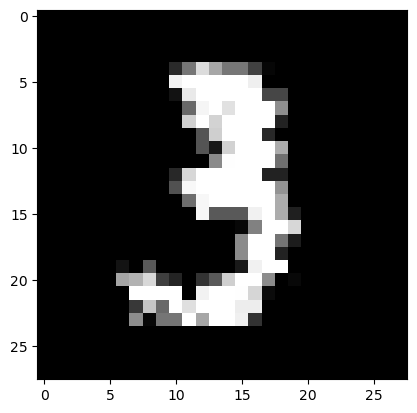

In [6]:
image, label = train_dataset[10]
plt.imshow(image.reshape(28,28), cmap='gray')
print('Label:', label)

In [7]:
train_dl = DataLoader(train_dataset,batch_size=100,shuffle=True)
valid_dl = DataLoader(valid_dataset,batch_size=100*2)

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc4 = nn.Linear(512, 10)



    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [9]:
model = CNN()

In [10]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')
device

'cuda'

In [11]:
model = model.to(device)

In [12]:
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# criterion = nn.CrossEntropyLoss()

# # Training loop
# epochs = 10
# for epoch in range(epochs):
#     model.train()
#     running_loss = 0.0
#     correct_train = 0
#     total_train = 0
#     for images, labels in train_dl:
#         images,labels = images.to(device),labels.to(device)
#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
        
#         _, predicted = torch.max(outputs.data, 1)
#         total_train += labels.size(0)
#         correct_train += (predicted == labels).sum().item()
    
#     train_loss = running_loss / len(train_dl)
#     train_accuracy = correct_train / total_train

#     model.eval()
#     correct_valid = 0
#     total_valid = 0
#     val_loss = 0.0
#     with torch.no_grad():
#         for images, labels in valid_dl:
#             images,labels = images.to(device),labels.to(device)
#             outputs = model(images)
#             _, predicted = torch.max(outputs.data, 1)
#             total_valid += labels.size(0)
#             correct_valid += (predicted == labels).sum().item()
#             val_loss += criterion(outputs, labels).item()
#     val_accuracy = correct_valid / total_valid
#     val_loss /= len(valid_dl)

#     print(f"Epoch {epoch+1}/{epochs}, "
#           f"Training Loss: {train_loss:.4f}, "
#           f"Training Accuracy: {train_accuracy:.4f}, "
#           f"Validation Loss: {val_loss:.4f}, "
#           f"Validation Accuracy: {val_accuracy:.4f}")

In [13]:
# torch.save(model,"/home/bsusheelkumar/MNIST/model.pth")

In [14]:
model = torch.load("model.pth")

In [15]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in valid_dl:
        images,labels = images.to(device),labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy on the test images: %d %%' % (100 * correct / total))

Accuracy on the test images: 98 %


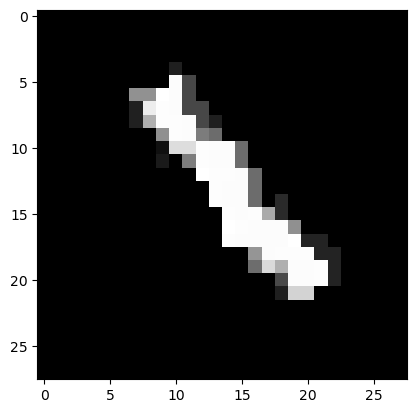

In [16]:
x = train_dataset[6][0]
plt.imshow(x.reshape(28,28),cmap='gray')

In [17]:
x = x.unsqueeze(0)

In [18]:
x.shape

torch.Size([1, 1, 28, 28])

In [19]:
x = x.to(device)
output = model(x)
_,predicted = torch.max(output,1)
predicted